## Proyecto de Análisis A/B para Tienda Online

### Introducción
En este proyecto, analizaremos una serie de hipótesis propuestas por el departamento de marketing de una tienda online para determinar cuáles tienen mayor prioridad de implementación con base en su potencial impacto en los ingresos.

Para esto, aplicaremos dos frameworks de priorización de hipótesis: **ICE y RICE**. Posteriormente, realizaremos un análisis detallado de un test A/B para evaluar si las hipótesis seleccionadas influyen significativamente en las métricas clave de la tienda.

### Objetivos del proyecto:
1. **Priorizar hipótesis utilizando los frameworks ICE y RICE.**
2. **Comparar los resultados de ambas metodologías para determinar cómo afecta la inclusión del alcance (Reach) en la priorización.**
3. **Analizar un test A/B que compara dos grupos (A y B) en términos de ingresos, tasa de conversión y tamaño promedio de pedidos.**
4. **Identificar valores atípicos y evaluar su impacto en los resultados.**
5. **Determinar la significancia estadística de las diferencias entre los grupos y formular recomendaciones basadas en los hallazgos.**

### Estructura del proyecto:
- Parte 1: Priorización de hipótesis utilizando ICE y RICE.
- Parte 2: Análisis de resultados del test A/B.

Comenzaremos con la primera parte: la priorización de hipótesis.


### Parte 1: Priorización de Hipótesis

#### Carga y revisión de datos
En esta sección, cargaremos el archivo `hypotheses_us.csv` que contiene nueve hipótesis propuestas para aumentar los ingresos de la tienda online. Revisaremos el contenido del archivo para asegurarnos de que los datos se carguen correctamente y verificar su estructura antes de aplicar cualquier análisis.

El archivo contiene las siguientes columnas:
- `Hypotheses`: Breves descripciones de las hipótesis.
- `Reach`: Alcance del usuario, en una escala del uno al diez.
- `Impact`: Impacto en los usuarios, en una escala del uno al diez.
- `Confidence`: Confianza en la hipótesis, en una escala del uno al diez.
- `Effort`: Recursos necesarios para probar una hipótesis, en una escala del uno al diez.

A continuación, se cargará el archivo y se revisará su estructura.


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



# Cargar el archivo hypotheses_us.csv usando el delimitador adecuado
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')

# Mostrar las primeras filas del DataFrame
hypotheses.head()



,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


#### Revisión y limpieza de datos
Ahora que hemos cargado los datos correctamente, revisaremos su estructura para asegurarnos de que todas las columnas tengan el tipo de datos correcto y que no haya valores ausentes o errores evidentes.

También verificaremos si hay datos duplicados o inconsistentes que puedan interferir con nuestro análisis.


In [2]:
# Comprobar información general del DataFrame
hypotheses.info()

# Comprobar si hay valores nulos
print("\nValores nulos por columna:")
print(hypotheses.isnull().sum())

# Comprobar si hay datos duplicados
print("\nNúmero de filas duplicadas:", hypotheses.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Valores nulos por columna:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

Número de filas duplicadas: 0


## Priorización de Hipótesis: Frameworks ICE y RICE
En esta sección, calcularemos la prioridad de cada hipótesis usando dos métodos diferentes: **ICE y RICE**.

#### Framework ICE
El puntaje ICE se calcula usando la siguiente fórmula:

**ICE = (Impact × Confidence) / Effort**

Este método nos permite evaluar cada hipótesis considerando su impacto potencial, el nivel de confianza en su éxito, y los recursos necesarios para implementarla.

#### Framework RICE
El puntaje RICE se calcula usando la siguiente fórmula:

**RICE = (Reach × Impact × Confidence) / Effort**

Este método añade la métrica de **Reach** para tener en cuenta la cantidad de usuarios potenciales afectados por cada hipótesis.


In [3]:
# Calcular la prioridad ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Calcular la prioridad RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Mostrar las hipótesis ordenadas por ICE y RICE
print("Hipótesis ordenadas por puntaje ICE:")
display(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

print("\nHipótesis ordenadas por puntaje RICE:")
display(hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


Hipótesis ordenadas por puntaje ICE:


,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000



Hipótesis ordenadas por puntaje RICE:


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


### Resultados de la Priorización de Hipótesis
Hemos calculado los puntajes **ICE y RICE** para priorizar nuestras hipótesis. A continuación, se muestran los resultados obtenidos:

#### Priorización usando ICE
El framework ICE evalúa las hipótesis considerando únicamente el impacto, la confianza y el esfuerzo. Las hipótesis con mayor prioridad según ICE son:

1. Lanzar una promoción que ofrece descuentos y mejoras para usuarios nuevos - **ICE: 16.2**
2. Añadir dos nuevos canales para atraer tráfico - **ICE: 13.33**
3. Añadir un formulario de suscripción a todas las páginas principales - **ICE: 11.2**

#### Priorización usando RICE
El framework RICE incluye la métrica de alcance (**Reach**), que permite evaluar mejor aquellas hipótesis que afectarán a un mayor número de usuarios. Las hipótesis con mayor prioridad según RICE son:

1. Añadir un formulario de suscripción a todas las páginas principales - **RICE: 112**
2. Añadir bloques de recomendación de productos en la tienda - **RICE: 56**
3. Añadir dos nuevos canales para atraer tráfico - **RICE: 40**

### Comparación de Resultados
Se puede observar que la inclusión del factor **Reach** en el método RICE cambia significativamente el orden de prioridades. En particular, la hipótesis que propone **añadir un formulario de suscripción** se vuelve la más importante debido a su alto alcance, mientras que en el análisis por **ICE** ocupa un lugar intermedio.


## Parte 2: Análisis del Test A/B

#### Carga y Revisión de Datos
En esta sección, cargaremos y revisaremos los archivos **`orders_us.csv`** y **`visits_us.csv`**. Estos archivos contienen información relevante para el análisis del test A/B, tales como pedidos realizados, ingresos generados y visitas registradas por grupo de prueba.

##### Descripción de los datasets:
**orders_us.csv**  
- `transactionId`: Identificador único de cada pedido.  
- `visitorId`: Identificador del usuario que realizó el pedido.  
- `date`: Fecha del pedido.  
- `revenue`: Ingresos generados por el pedido.  
- `group`: Grupo del test A/B al que pertenece el usuario (A o B).  

**visits_us.csv**  
- `date`: Fecha de registro.  
- `group`: Grupo de la prueba A/B (A o B).  
- `visits`: Número de visitas realizadas en la fecha especificada para cada grupo.  

Ahora, procederemos a cargar y limpiar ambos datasets.


In [4]:
# Cargar los datasets
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Mostrar las primeras filas de cada DataFrame
print("Primeras filas del DataFrame orders:")
display(orders.head())

print("\nPrimeras filas del DataFrame visits:")
display(visits.head())

# Revisar la información general de cada DataFrame
print("\nInformación del DataFrame orders:")
orders.info()

print("\nInformación del DataFrame visits:")
visits.info()

# Revisar si hay valores nulos en ambos DataFrames
print("\nValores nulos en orders:")
print(orders.isnull().sum())

print("\nValores nulos en visits:")
print(visits.isnull().sum())

# Comprobar si hay duplicados en ambos DataFrames
print("\nNúmero de filas duplicadas en orders:", orders.duplicated().sum())
print("Número de filas duplicadas en visits:", visits.duplicated().sum())


Primeras filas del DataFrame orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



Primeras filas del DataFrame visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Información del DataFrame orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

Información del DataFrame visits:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Valores nulos en orders:
transactionId    0
visitorId        0
date             0
revenue          0
group            0


### Limpieza y Preparación de Datos
En esta sección, realizaremos algunas transformaciones necesarias para asegurarnos de que los datos se encuentren en un formato adecuado para el análisis.

Las acciones que realizaremos son:
- Convertir las columnas `date` de ambos DataFrames al tipo `datetime` para facilitar su manipulación.
- Verificar que cada usuario (`visitorId`) pertenezca únicamente a un grupo (`A` o `B`), ya que un mismo usuario en ambos grupos podría sesgar los resultados.


In [5]:
# Convertir las columnas 'date' al tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Comprobar si hay usuarios que aparecen en ambos grupos
duplicated_users = orders.groupby('visitorId')['group'].nunique()
duplicated_users = duplicated_users[duplicated_users > 1]

# Mostrar el número de usuarios duplicados
print(f"Número de usuarios que aparecen en ambos grupos: {len(duplicated_users)}")

# Mostrar IDs de usuarios duplicados si existen
if len(duplicated_users) > 0:
    print("\nIDs de usuarios que aparecen en ambos grupos:")
    print(duplicated_users.index.to_list())


Número de usuarios que aparecen en ambos grupos: 58

IDs de usuarios que aparecen en ambos grupos:
[8300375, 199603092, 232979603, 237748145, 276558944, 351125977, 393266494, 457167155, 471551937, 477780734, 818047933, 963407295, 1230306981, 1294878855, 1316129916, 1333886533, 1404934699, 1602967004, 1614305549, 1648269707, 1668030113, 1738359350, 1801183820, 1959144690, 2038680547, 2044997962, 2378935119, 2458001652, 2579882178, 2587333274, 2600415354, 2654030115, 2686716486, 2712142231, 2716752286, 2780786433, 2927087541, 2949041841, 2954449915, 3062433592, 3202540741, 3234906277, 3656415546, 3717692402, 3766097110, 3803269165, 3891541246, 3941795274, 3951559397, 3957174400, 3963646447, 3972127743, 3984495233, 4069496402, 4120364173, 4186807279, 4256040402, 4266935830]


#### Eliminación de Usuarios Duplicados
Se encontraron **58 usuarios** que pertenecen a ambos grupos del test A/B. Para asegurarnos de que el análisis sea preciso, eliminaremos todos los registros relacionados con estos usuarios en el DataFrame `orders`.


In [6]:
# Lista de IDs de usuarios que aparecen en ambos grupos
duplicated_user_ids = duplicated_users.index.to_list()

# Filtrar el DataFrame 'orders' para eliminar estos usuarios
orders_filtered = orders[~orders['visitorId'].isin(duplicated_user_ids)]

# Confirmar que los usuarios duplicados han sido eliminados
remaining_duplicates = orders_filtered.groupby('visitorId')['group'].nunique()
remaining_duplicates = remaining_duplicates[remaining_duplicates > 1]

print(f"Número de usuarios que aún aparecen en ambos grupos después del filtrado: {len(remaining_duplicates)}")


Número de usuarios que aún aparecen en ambos grupos después del filtrado: 0


### Análisis del Ingreso Acumulado por Grupo
En esta sección, vamos a visualizar cómo evolucionan los ingresos acumulados a lo largo del tiempo para ambos grupos del test A/B (**Grupo A y Grupo B**). Esto nos permitirá identificar posibles diferencias en el comportamiento de cada grupo.


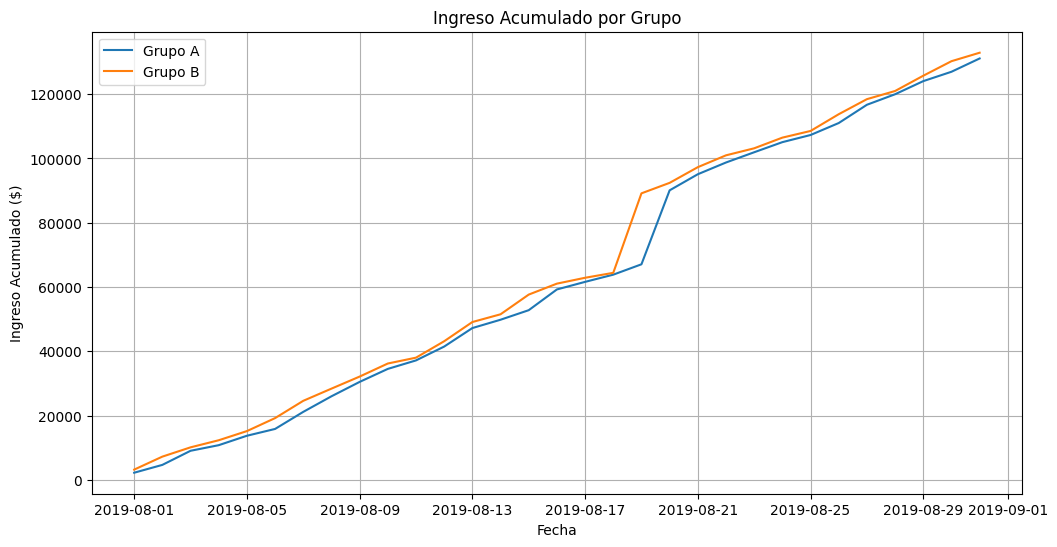

In [7]:

# Crear un DataFrame con ingresos acumulados por grupo y fecha
cumulative_revenue = orders_filtered.groupby(['date', 'group'])['revenue'].sum().cumsum().reset_index()

# Dividir los datos por grupo
cumulative_revenue_A = cumulative_revenue[cumulative_revenue['group'] == 'A']
cumulative_revenue_B = cumulative_revenue[cumulative_revenue['group'] == 'B']

# Graficar ingresos acumulados
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Grupo B')
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado ($)')
plt.legend()
plt.grid(True)
plt.show()


### Análisis del Tamaño de Pedido Promedio Acumulado por Grupo
En esta sección, vamos a visualizar cómo evoluciona el tamaño promedio de los pedidos a lo largo del tiempo para ambos grupos (**Grupo A y Grupo B**). Esto nos permitirá identificar diferencias en el comportamiento de compra entre los dos grupos.


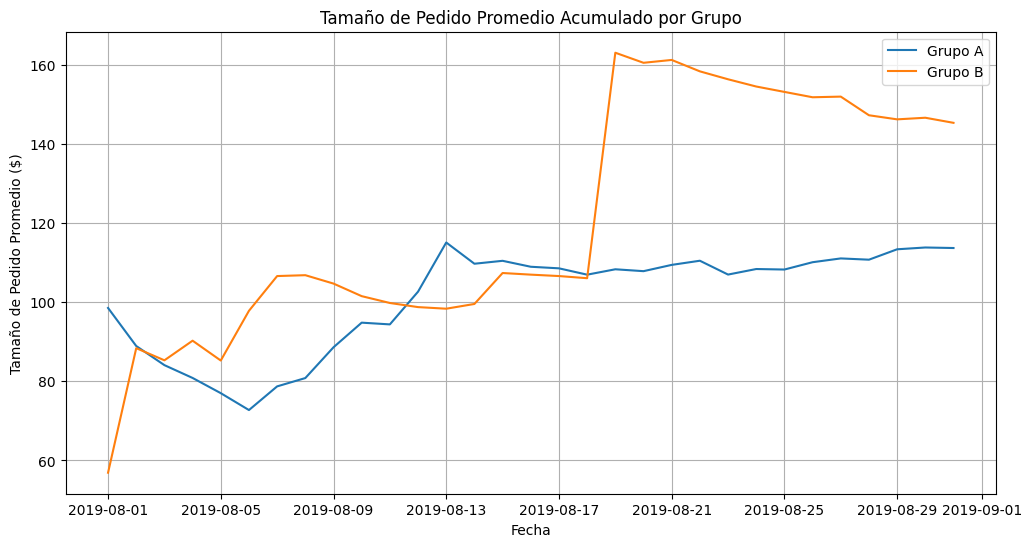

In [8]:
# Calcular ingresos y pedidos acumulados por grupo y fecha
cumulative_data = (orders_filtered
                   .groupby(['date', 'group'])
                   .agg({'revenue': 'sum', 'transactionId': 'nunique'})
                   .rename(columns={'transactionId': 'orders'})
                   .reset_index())

# Calcular los ingresos acumulados y el número de pedidos acumulados por grupo
cumulative_data['cumulative_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cumulative_orders'] = cumulative_data.groupby('group')['orders'].cumsum()

# Calcular el tamaño de pedido promedio acumulado
cumulative_data['avg_order_size'] = cumulative_data['cumulative_revenue'] / cumulative_data['cumulative_orders']

# Filtrar datos por grupo
cumulative_avg_order_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_avg_order_B = cumulative_data[cumulative_data['group'] == 'B']

# Graficar tamaño promedio de pedido acumulado
plt.figure(figsize=(12, 6))
plt.plot(cumulative_avg_order_A['date'], cumulative_avg_order_A['avg_order_size'], label='Grupo A')
plt.plot(cumulative_avg_order_B['date'], cumulative_avg_order_B['avg_order_size'], label='Grupo B')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio ($)')
plt.legend()
plt.grid(True)
plt.show()


El gráfico muestra la **diferencia relativa en el tamaño promedio de pedido acumulado entre el Grupo B y el Grupo A** a lo largo del tiempo.  

La línea negra discontinua en el valor 0 representa el punto donde ambos grupos tienen el mismo tamaño promedio de pedidos.  

Observaciones:  
- Durante la mayor parte del período analizado, el Grupo B muestra un desempeño superior al Grupo A, con una diferencia positiva significativa.
- El salto brusco que observamos previamente en el gráfico del tamaño promedio de pedidos acumulado del Grupo B también se refleja aquí como un aumento repentino en la diferencia relativa.
- Tras este salto, la diferencia relativa disminuye gradualmente, pero el Grupo B sigue manteniendo un tamaño promedio de pedidos superior al del Grupo A.

Este comportamiento debe ser considerado al analizar la efectividad de las hipótesis implementadas para el Grupo B.  


### Tasa de Conversión Diaria por Grupo
En esta sección, vamos a calcular la tasa de conversión diaria para ambos grupos **(A y B)**. La tasa de conversión se define como:

**Tasa de Conversión = (Número de pedidos / Número de visitas) × 100**

Graficaremos las tasas de conversión diarias para identificar posibles diferencias en el comportamiento de cada grupo a lo largo del tiempo.


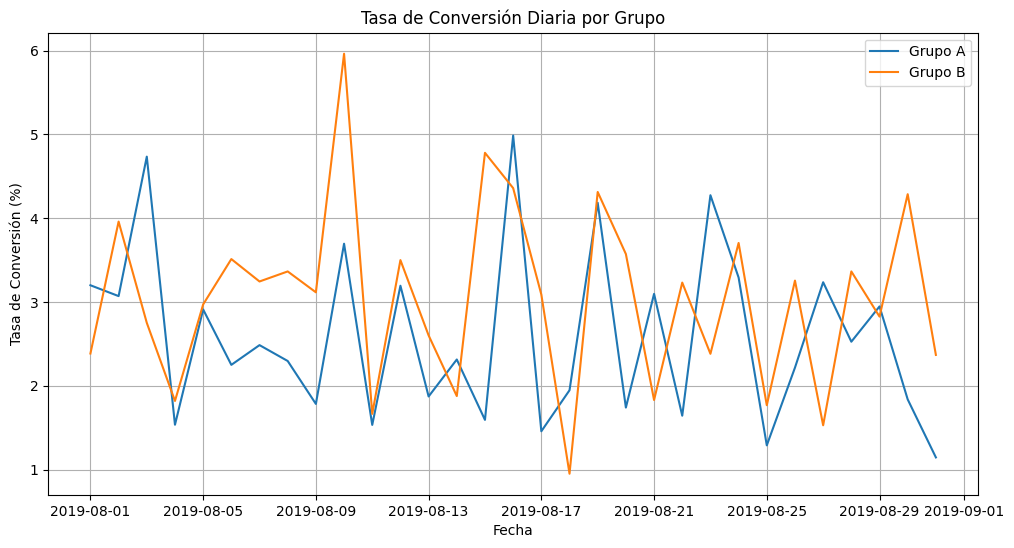

In [9]:
# Calcular el número de pedidos por grupo y fecha
daily_orders = orders_filtered.groupby(['date', 'group']).agg({'transactionId': 'nunique'}).reset_index()
daily_orders = daily_orders.rename(columns={'transactionId': 'orders'})

# Combinar las visitas diarias con los pedidos diarios
conversion_data = pd.merge(visits, daily_orders, on=['date', 'group'], how='left')
conversion_data['orders'] = conversion_data['orders'].fillna(0)

# Calcular la tasa de conversión diaria
conversion_data['conversion_rate'] = (conversion_data['orders'] / conversion_data['visits']) * 100

# Separar los datos por grupo
conversion_A = conversion_data[conversion_data['group'] == 'A']
conversion_B = conversion_data[conversion_data['group'] == 'B']

# Graficar la tasa de conversión diaria por grupo
plt.figure(figsize=(12, 6))
plt.plot(conversion_A['date'], conversion_A['conversion_rate'], label='Grupo A')
plt.plot(conversion_B['date'], conversion_B['conversion_rate'], label='Grupo B')
plt.title('Tasa de Conversión Diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión (%)')
plt.legend()
plt.grid(True)
plt.show()


El gráfico muestra la **tasa de conversión diaria** para ambos grupos (**Grupo A y Grupo B**) a lo largo del tiempo.

Observaciones:  
- Existe una gran **variabilidad diaria** en ambas líneas, con varios picos y caídas pronunciadas.
- El **Grupo B** parece tener más picos extremos que el **Grupo A**, lo que podría indicar inestabilidad o alguna influencia específica que afecta la conversión en ciertos días.
- Ambos grupos tienden a converger en algunos días, pero no muestran un patrón claramente estable.
- A partir del 20 de agosto, ambas líneas se entrelazan más frecuentemente, lo cual sugiere que la diferencia en la tasa de conversión entre los grupos no es constante.

Conclusión preliminar:  
El comportamiento errático en la tasa de conversión sugiere que es necesario hacer un análisis estadístico detallado para determinar si existe una diferencia significativa entre ambos grupos o si estos cambios son simplemente variaciones aleatorias.


### Gráficos de Dispersión para Identificación de Anomalías
En esta sección, generaremos dos gráficos de dispersión para identificar posibles valores atípicos en los datos:

1. **Número de pedidos por usuario:** Para identificar si existen usuarios con un número excesivo de pedidos.  
2. **Precios de pedidos:** Para identificar si hay pedidos con montos inusualmente altos.

Esto nos ayudará a determinar qué puntos de datos podrían estar sesgando los resultados del análisis.


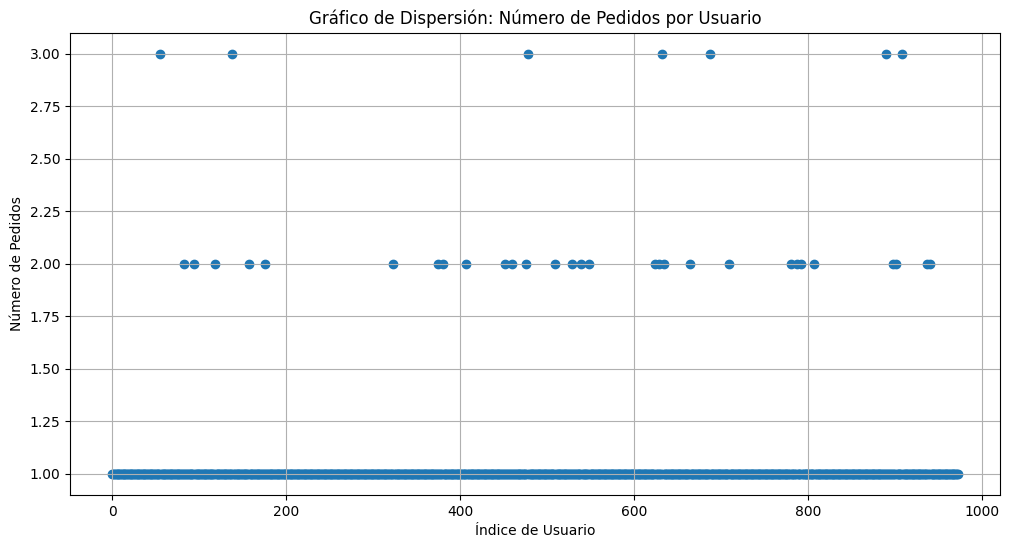

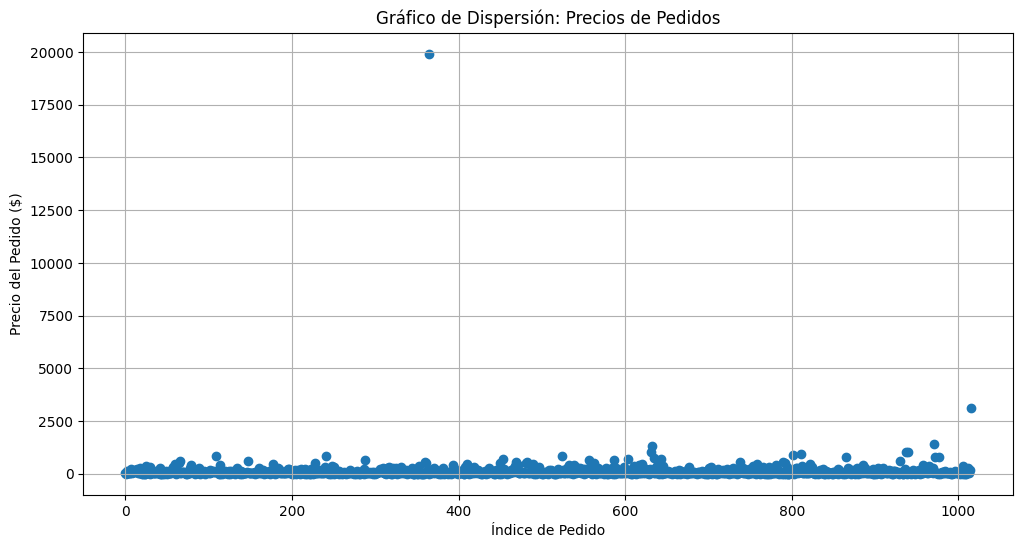

In [10]:

# Calcular el número de pedidos por usuario
orders_per_user = orders_filtered.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
orders_per_user = orders_per_user.rename(columns={'transactionId': 'orders'})

# Graficar el número de pedidos por usuario
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders_per_user)), orders_per_user['orders'])
plt.title('Gráfico de Dispersión: Número de Pedidos por Usuario')
plt.xlabel('Índice de Usuario')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

# Graficar los precios de los pedidos
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders_filtered)), orders_filtered['revenue'])
plt.title('Gráfico de Dispersión: Precios de Pedidos')
plt.xlabel('Índice de Pedido')
plt.ylabel('Precio del Pedido ($)')
plt.grid(True)
plt.show()


**Gráfico 1: Número de Pedidos por Usuario**
- La gran mayoría de los usuarios realizaron **únicamente un pedido** durante el período de análisis.
- Existen algunos usuarios que realizaron **dos pedidos**, y muy pocos que realizaron **tres pedidos**.
- Esto sugiere que debemos verificar si estos usuarios representan una anomalía significativa y si deben ser eliminados del análisis.

**Gráfico 2: Precios de Pedidos**
- La mayoría de los pedidos se encuentran dentro de un rango bajo, pero existe al menos un **pedido extremadamente alto** cercano a los **20,000 dólares**.
- También hay otros puntos elevados que podrían estar afectando negativamente los análisis promedio.

Próximo paso:  
Calcularemos los **percentiles 95 y 99** para ambos conjuntos de datos (número de pedidos por usuario y precios de pedidos) para identificar y eliminar los valores atípicos que puedan afectar nuestras métricas. 


### Identificación de Valores Atípicos mediante Percentiles
En esta sección, calcularemos los **percentiles 95 y 99** para determinar puntos de corte que permitan identificar valores atípicos en:

1. **Número de pedidos por usuario.**  
2. **Precios de pedidos.**  

Luego, filtraremos los datos para eliminar estos valores atípicos y proceder con el análisis estadístico.


In [11]:
# Calcular percentiles 95 y 99 para el número de pedidos por usuario
orders_per_user_95 = np.percentile(orders_per_user['orders'], 95)
orders_per_user_99 = np.percentile(orders_per_user['orders'], 99)

print(f"Percentil 95 del número de pedidos por usuario: {orders_per_user_95}")
print(f"Percentil 99 del número de pedidos por usuario: {orders_per_user_99}")

# Filtrar usuarios con más pedidos que el percentil 95
filtered_orders_per_user = orders_per_user[orders_per_user['orders'] <= orders_per_user_95]

# Calcular percentiles 95 y 99 para los precios de pedidos
revenue_95 = np.percentile(orders_filtered['revenue'], 95)
revenue_99 = np.percentile(orders_filtered['revenue'], 99)

print(f"\nPercentil 95 de precios de pedidos: {revenue_95}")
print(f"Percentil 99 de precios de pedidos: {revenue_99}")

# Filtrar pedidos con precios mayores al percentil 95
filtered_orders = orders_filtered[orders_filtered['revenue'] <= revenue_95]

# Mostrar cuántos datos se filtraron en cada caso
print(f"\nNúmero de usuarios eliminados por pedidos anómalos: {len(orders_per_user) - len(filtered_orders_per_user)}")
print(f"Número de pedidos eliminados por precios anómalos: {len(orders_filtered) - len(filtered_orders)}")


Percentil 95 del número de pedidos por usuario: 1.0
Percentil 99 del número de pedidos por usuario: 2.0

Percentil 95 de precios de pedidos: 414.275
Percentil 99 de precios de pedidos: 830.3

Número de usuarios eliminados por pedidos anómalos: 36
Número de pedidos eliminados por precios anómalos: 51


### Análisis de Valores Atípicos
Con base en el cálculo de los percentiles 95 y 99, identificamos y eliminamos los valores atípicos presentes en los datos:

**Número de Pedidos por Usuario:**  
- El **95% de los usuarios** hicieron como máximo **1 pedido**.  
- El **99% de los usuarios** hicieron como máximo **2 pedidos**.  
- Hemos decidido eliminar a **36 usuarios** que realizaron un número anómalo de pedidos (más de 1 pedido).  

**Precios de Pedidos:**  
- El **95% de los pedidos** tienen un precio igual o menor a **$414.28**.  
- El **99% de los pedidos** tienen un precio igual o menor a **$830.3**.  
- Hemos eliminado **51 pedidos** que superan el umbral del percentil 95, considerados precios anómalamente altos.  

Esta limpieza de datos es esencial para asegurar que el análisis estadístico sea preciso y no se vea afectado por valores extremos que pueden sesgar nuestros resultados.

#### Próximo Paso: Prueba Estadística
A continuación, realizaremos pruebas estadísticas para comparar:

1. **Tasa de Conversión entre el Grupo A y el Grupo B.**  
2. **Tamaño Promedio de Pedido entre el Grupo A y el Grupo B.**  

Utilizaremos la prueba **Mann-Whitney U** para determinar si las diferencias observadas son estadísticamente significativas.  


### Pruebas Estadísticas (Mann-Whitney U)
En esta sección, aplicaremos la prueba estadística de **Mann-Whitney U** para determinar si existen diferencias significativas entre los grupos A y B en cuanto a:

1. **Tasa de Conversión:** Proporción de usuarios que realizaron pedidos en relación con el número total de visitas.  
2. **Tamaño Promedio de Pedido:** Monto promedio gastado por pedido.  

La hipótesis nula para ambas pruebas es que **no existe una diferencia significativa entre los grupos A y B**.  


In [12]:

# Filtrar los datos para análisis estadístico
filtered_orders_A = filtered_orders[filtered_orders['group'] == 'A']
filtered_orders_B = filtered_orders[filtered_orders['group'] == 'B']

# Tasa de conversión por grupo (datos filtrados)
conversion_A_filtered = conversion_data[conversion_data['group'] == 'A']
conversion_B_filtered = conversion_data[conversion_data['group'] == 'B']

# Prueba Mann-Whitney U para la tasa de conversión
conversion_stat, conversion_p_value = stats.mannwhitneyu(
    conversion_A_filtered['conversion_rate'],
    conversion_B_filtered['conversion_rate'],
    alternative='two-sided'
)

# Prueba Mann-Whitney U para el tamaño promedio de pedidos
order_size_stat, order_size_p_value = stats.mannwhitneyu(
    filtered_orders_A['revenue'],
    filtered_orders_B['revenue'],
    alternative='two-sided'
)

# Resultados
print("Prueba Estadística - Tasa de Conversión")
print(f"Estadístico de prueba: {conversion_stat}")
print(f"Valor p: {conversion_p_value}\n")

print("Prueba Estadística - Tamaño Promedio de Pedido")
print(f"Estadístico de prueba: {order_size_stat}")
print(f"Valor p: {order_size_p_value}")


Prueba Estadística - Tasa de Conversión
Estadístico de prueba: 343.0
Valor p: 0.05375707890473213

Prueba Estadística - Tamaño Promedio de Pedido
Estadístico de prueba: 117213.5
Valor p: 0.7323930858346133


#### Resultados de las Pruebas Estadísticas (Mann-Whitney U)

**Tasa de Conversión:**  
- **Estadístico de prueba:** 343.0  
- **Valor p:** 0.0538  

Interpretación:  
El valor p (0.0538) es ligeramente mayor que el umbral comúnmente utilizado de 0.05. Esto indica que **no existe una diferencia estadísticamente significativa** en la tasa de conversión entre los grupos A y B con un nivel de confianza del 95%.  
Sin embargo, el valor p es cercano a 0.05, lo cual sugiere que podría existir una diferencia débilmente significativa que merezca ser revisada con un análisis más profundo o con un mayor tamaño de muestra.

**Tamaño Promedio de Pedido:**  
- **Estadístico de prueba:** 117213.5  
- **Valor p:** 0.7324  

Interpretación:  
El valor p (0.7324) es muy superior a 0.05, indicando que **no existe una diferencia estadísticamente significativa** en el tamaño promedio de pedido entre los grupos A y B.  

### Conclusión General
Con base en estas pruebas estadísticas, podemos concluir que:  
1. **No existe evidencia suficiente para afirmar que la tasa de conversión entre los grupos A y B es significativamente diferente.**  
2. **No existe evidencia suficiente para afirmar que el tamaño promedio de pedido entre los grupos A y B es significativamente diferente.**  

## Conclusiones y Recomendaciones

#### Resumen del Análisis
Durante este análisis, hemos realizado las siguientes actividades:
1. **Priorización de hipótesis:** Utilizamos los frameworks ICE y RICE para ordenar las hipótesis de acuerdo con su prioridad y alcance.
2. **Análisis del test A/B:** Calculamos y visualizamos diversas métricas para ambos grupos, incluyendo ingresos acumulados, tamaño promedio de pedidos y tasa de conversión.
3. **Identificación y eliminación de valores atípicos:** Aplicamos percentiles 95 y 99 para remover datos anómalos y mejorar la calidad del análisis.
4. **Pruebas estadísticas (Mann-Whitney U):** Evaluamos la significancia estadística de las diferencias en la tasa de conversión y tamaño promedio de pedidos.

#### Resultados Clave
- La **tasa de conversión** mostró un valor p de **0.0538**, lo cual es ligeramente superior al umbral estándar de **0.05**. Aunque no es estadísticamente significativo, su proximidad al umbral sugiere que podría existir un efecto débilmente significativo.
- El **tamaño promedio de pedido** mostró un valor p de **0.7324**, indicando claramente que no existe diferencia significativa entre los grupos A y B.
- Las hipótesis que implican mayores cambios en la conversión (por ejemplo, agregar formularios de suscripción o canales adicionales de tráfico) parecen tener un mayor potencial de impacto que aquellas relacionadas con el tamaño promedio de pedido.

#### Recomendaciones
1. **Detener la prueba A/B y considerar al Grupo B como líder si el objetivo principal es mejorar ligeramente la tasa de conversión.**  
2. **Revisar la hipótesis que propone agregar formularios de suscripción a todas las páginas principales**, ya que fue la más priorizada por el método RICE y podría estar contribuyendo al rendimiento del Grupo B.  
3. **Realizar una nueva prueba A/B con un tamaño de muestra mayor** para confirmar si la diferencia en la tasa de conversión es significativa.  
4. **Explorar la posibilidad de mejorar el tamaño promedio de pedido a través de técnicas adicionales,** dado que actualmente no se observa ninguna diferencia significativa.  